In [1]:
#- main machine learning libraries used

# import tensorflow
import tensorflow as tf
import tensorflow.keras as keras  
import sklearn
from sklearn.metrics import mean_squared_error


#- other libraries used
import itertools
import numpy as np
import os
import math
import pandas as pd
import matplotlib.pyplot as plt 
from platform import python_version
from datetime import datetime as dt

In [2]:
python_version()

'3.9.12'

In [3]:
today = dt.today()
print('latest run on:', today)

latest run on: 2022-06-14 17:25:33.550040


In [4]:
now1 = dt.now()
now1

datetime.datetime(2022, 6, 14, 17, 25, 33, 555249)

## check tensorflow version

In [5]:
print (tf.__version__)

2.9.1


## my functions(.) here

## input directory

In [6]:
dataset_dir = "/Users/ehsanmos/MLP_dataset"

In [7]:
if os.path.isdir(dataset_dir) == False:
    print("dataset directory NOT found!")
else:
    print("dataset directory FOUND!")

dataset directory FOUND!


## Load input/ training dataset

before doing this section, process filter final input dataset with "check_n_filter_final_dataset"

In [8]:
in_ds = "atmmodel_april_2016_k_zero_9cams4bands_preprocessed.csv"

## check if input dataset file exists

In [9]:
in_ds_fullpath = os.path.join(dataset_dir, in_ds)
print(in_ds_fullpath)

if (not os.path.isfile(os.path.join(in_ds_fullpath))):
    raise SystemExit()
else:
    print("input dataset found!")

/Users/ehsanmos/MLP_dataset/atmmodel_april_2016_k_zero_9cams4bands_preprocessed.csv
input dataset found!


## Read in dataset and look at dataset columns

In [10]:
df_orig = pd.read_csv(in_ds_fullpath, engine='python')

In [11]:
df_orig.shape

(40775, 15)

In [12]:
df_orig.columns

Index(['firstLat', 'firstLon', 'anr', 'ang', 'anb', 'annir', 'aa', 'af', 'ba',
       'bf', 'ca', 'cf', 'da', 'df', 'rms'],
      dtype='object')

Note: we will build an input dataset with 9 cameras to train the mlp model

In [13]:
#- build dataset with 9 cameras
excluce_columns = ['firstLat', 'firstLon', 'ang', 'anb', 'annir']
input_ds_for_training = df_orig.drop(excluce_columns, axis=1)

print('we are using %s columns in our training dataset:' %len(input_ds_for_training.columns))
print(input_ds_for_training.columns)  # columns should be only 9 cameras + rms 


we are using 10 columns in our training dataset:
Index(['anr', 'aa', 'af', 'ba', 'bf', 'ca', 'cf', 'da', 'df', 'rms'], dtype='object')


## shuffle rows of input dataset

In [14]:
from sklearn.utils import shuffle

input_ds_for_training = shuffle(input_ds_for_training)

## Split dataset to train-test parts for training algorithms
- we devided to plit our dataset to 2 parts (2-part split)
- Here we use the ‘train_test_split’ to split the data in 80:20 ratio i.e. 80% of the data will be used for training the model while 20% will be used for testing the model that is built out of it.
- note: last column should be label == rms

In [15]:
#- split data set to X and Y

X = input_ds_for_training.iloc[:, :-1] # to select up to last column of dataset OR [:, 0:3]
Y = input_ds_for_training.iloc[:, -1:] # to select last column of DF

print(X.shape)
print(Y.shape)

(40775, 9)
(40775, 1)


In [16]:
#- now split dataset to train-test

from sklearn.model_selection import train_test_split

#- we use this function to split data-- from here because we are usiong SKlearn library, we change all data structures from Pandas DF to numpy
# X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.2, random_state=123) # Q- input is DF or numpy array?

test_data_size = 0.3
print("test size= %d percent" %(test_data_size*100))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_data_size, random_state=123) # Q- input is DF or numpy array?


print("train:")
print(x_train.shape)
print(y_train.shape)

print("test:")
print(x_test.shape)
print(y_test.shape)


test size= 30 percent
train:
(28542, 9)
(28542, 1)
test:
(12233, 9)
(12233, 1)


In [17]:
# x_test

## >>> Linear regression >>>

In [18]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# # Create linear regression object 
# mlr_model = LinearRegression() # create an estimator obj
# ##- Train the model using the training sets- here we use X_train(3 features)
# mlr_model.fit(x_train, y_train) # fit(X,y) will fit data to our algortihm and makes it learn from data == training step


# # Predict using the linear model- on specific block data- on transect data
# x_test = 'open 3 MISR cameras that create transect block, create x_test dataset from 3 cameras (an, ca, cf), and then make prediction '
# y_pred_mlr = mlr_model.predict(x_test)


# r2_model = r2_score(y_test, y_pred_mlr)
# print('R2: %s' %round(r2_model,2))

# print('Test RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_pred_mlr))) # square root of MSE.

# ############ scatter plot #####
# fig, ax = plt.subplots()
# ax.scatter(y_test, y_pred_mlr)

# # ax.plot([y_actual.min(), y_actual.max()], [y_predicted.min(), y_predicted.max()], 'k--', lw=4)
# # ax.set_xlabel('Actual')
# # ax.set_ylabel('Predicted')


# ########### QQ plot ###########
# import scipy.stats as stats

# # residuals = y_test - y_pred_mlr
# # residuals

# # plt.figure(figsize=(7,7))
# # stats.probplot(residuals, dist="norm", plot=plt)
# # plt.title("Normal Q-Q Plot")
    

Qn- how about train-val-test (3 sections)? is this for DL?

## Feature scalling/ rescaling

change the scale/range of input features from their original range to a new range. So changed features will have mean=0 and std=1.

source: https://www.enjoyalgorithms.com/blog/need-of-feature-scaling-in-machine-learning

- We rescale data after we split data to train-test
- all features have the same range to reduce bias in data 
- perform this step before splitting data into train-test split
- We normalize data using the training data

Qn- why FS is important? why we do FS?

Qn- which method? 

1) standardization/ Z-score/ StandardScaler() ==> rescale data to mean=0 & std=1; Standardize features by removing the mean and scaling to unit variance; good for datasets w/ outliers;

2) MinMaxScalar() == Transform/rescale features by scaling each feature to a given range (usually [0,1])

3) normalize() == Scale/rescale input vectors individually to unit norm (vector length).

source: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing



### 1) Using MinMaxScaler() method to rescale input features

In [19]:
# #- import necessary libraries for Neural Nets
# from sklearn.preprocessing import MinMaxScaler

# #- fit data

# scaler_x = MinMaxScaler()
# scaler_y = MinMaxScaler()

# scaler_x.fit(X_train) # returns Fitted scaler
# X_train_scaled = scaler_x.transform(X_train)  # transforms data

# scaler_x.fit(X_test)
# X_test_scaled = scaler_x.transform(X_test)

# scaler_y.fit(y_train)
# y_train_scaled = scaler_y.transform(y_train)

# scaler_y.fit(y_test)
# y_test_scaled = scaler_y.transform(y_test)

### 2) Using StandardScaler() method 

Rescale input features to mean=0 and std=1

In [20]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit(x_train).transform(x_train) # returns daata w/ mean 0 & std 1
y_train_scaled = scaler_y.fit(y_train).transform(y_train)
x_test_scaled = scaler_x.fit(x_test).transform(x_test)
y_test_scaled = scaler_y.fit(y_test).transform(y_test)

Check types of input dataset data structure; should be 2D arrays, or Pandas DataFrame

In [21]:
print(type(x_train_scaled))
# print(type(y_train_scaled))
# print(type(x_test_scaled))
# print(type(y_test_scaled))

print(x_train_scaled.mean())
print(x_train_scaled.std())
print(y_train_scaled.mean())
print(y_train_scaled.std())
print(x_test_scaled.mean())
print(x_test_scaled.std())
print(y_test_scaled.mean())
print(y_test_scaled.std())

<class 'numpy.ndarray'>
-1.2126454400813924e-16
0.8819171036881966
7.617758991752177e-17
1.0
-4.040071505906816e-17
0.8819171036881968
3.8219334597412404e-16
1.0


In [22]:
x_train_scaled.shape

(28542, 9)

## >>> Neural Network (Regression) >>>

### Building the NN model
Q- how find the best architecture? for mlp? 

let's do a architecture search

source: https://towardsdatascience.com/how-to-find-optimal-neural-network-architecture-with-tensorflow-the-easy-way-50575a03d060

In [23]:
def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'linear') -> list:   
        
        # https://stackoverflow.com/questions/14379753/what-does-mean-in-python-function-definitions
        # allowing you to attach metadata to functions, describe their parameters (their expected types) and return values
    
    # creates a list from nodes that we have defined [min, max, step]
    node_options = list(range(min_nodes_per_layer, 
                              max_nodes_per_layer + 1, 
                              node_step_size))
    
    # make a collection of sets of nodes for each hidden layer
    layer_possibilities = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilities))
#     print('permutations:')
#     print(layer_node_permutations)
    
    models = []
    for permutation in layer_node_permutations:
        
        # setup input layer
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_shape, name="input-layer"))
        model_name = ''
        
        # setup hidden layers
        for nodes_at_layer in permutation:
            model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
            model_name += 'dense_'+str(nodes_at_layer)+'_'

        # setup output layer
        model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation, name="output-layer-SIR"))
        model._name = model_name[:-1]
        models.append(model)
        
    return models

In [24]:
def optimize(models: list,
             X_train: np.array,
             y_train: np.array,
             X_test: np.array,
             y_test: np.array,
             epochs: int,
             batch_size: int, 
             validation_split: float,
             verbose: int = 0) -> pd.DataFrame:
    
    # We will store the results in this list
    results = []
    def train(model: tf.keras.Sequential) -> dict:
        
        adam_lrt = 0.001
        opt_alg = tf.keras.optimizers.Adam(
                    learning_rate=adam_lrt,   # then everu step * 10 to get to 10
                    beta_1=0.9,
                    beta_2=0.999,
                    epsilon=1e-07,
                    amsgrad=False,
                    name='Adam'
        )
        
        # Compile each model
        model.compile(
            loss='mse', 
            optimizer=opt_alg, 
            metrics=['mse','mae']
        )

        # Train the model/ fit alg. to dataset
        model.fit(
            X_train,
            y_train,
            epochs=epochs,
            verbose=verbose,
            batch_size=batch_size,
            validation_split=validation_split
            
        )
        

        # Make predictions on the test set
        y_pred_scaled = model.predict(X_test, verbose=verbose)  # Generates output predictions for the input samples
        # inverse y-pred to original scale
        y_pred = scaler_y.inverse_transform(y_pred_scaled)
        # compare y & y-hat in original scale
        rmse_pred_test = math.sqrt(mean_squared_error(y_test, y_pred))
        
##########################################       
#         # Evaluation on test data
#         preds = model.evaluate(
#             X_test, 
#             y_test, 
#             batch_size=20, 
#             verbose=0) # Returns the loss value & metrics values for the model in test mode
#         print('return of evaluate(.)')
#         print(preds)
#         mse_test = preds[1]
#         mae_test = preds[2]
##########################################         

        # Return evaluation metrics on the test set
        return {
            'model_name': model.name,
            #'test_rmse': math.sqrt(mse_test),
            #'test_mae': mae_test,
            'test_pred_rmse (cm)': round(rmse_pred_test, 1)
        }

    # Train every model and save results in the list above and tur it to DF
    for model in models:
        try:
            print(model.name, end=' ... \n')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}') # how change to nornal print?
        
    return pd.DataFrame(results)

## Building all models

iterate with different hidden layers + iterate over several node options in one single hidden layer

In [25]:
# num_layers = 6

# all_models = get_models(
#     num_layers=num_layers, 
#     min_nodes_per_layer=9, 
#     max_nodes_per_layer=27, 
#     node_step_size=9, 
#     input_shape=(9,) # should be tuple
# )

In [26]:
# all_models[0].summary()

## Running the optimization

In [27]:
# optimization_results = optimize(
#     models=all_models,
#     X_train=x_train_scaled,
#     y_train=y_train_scaled,
#     X_test=x_test_scaled,
#     y_test=y_test,
#     epochs=50,
#     batch_size=100,
#     validation_split=0.2
# )

In [28]:
# optimization_results

## write to disk

In [29]:
# output_dir = dataset_dir
# output_file = 'mlp_search_results_num_layers_'+str(num_layers)+'.csv'
# output_fp = os.path.join(output_dir, output_file)
# optimization_results.to_csv(output_fp, index=False)
# output_fp

# >>> run DNN again for one run >>>

## build/setup layers

In [30]:
def build_model(input_shape: int,
                hidden_layers_nodes: list,                
                hidden_layer_activation: str = 'relu',
                num_nodes_at_output: int = 1,
                output_layer_activation: str = 'linear'):
        
    # setup input layer
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape, name="input-layer"))
    model_name = ''

    # setup hidden layers
    for nodes_at_layer in hidden_layers_nodes:
        model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
        model_name += 'dense_'+str(nodes_at_layer)+'_'

    # setup output layer
    model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation, name="output-layer-SIR"))
    model._name = model_name[:-1]
    
    return model 


In [31]:
layers_node_list = [18,27,36,27,18]
built_model = build_model(input_shape = 9, 
                        hidden_layers_nodes = layers_node_list)

built_model

2022-06-14 17:25:34.295351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## compile DNN model

In [32]:
adam_lrt = 0.001
opt_alg = tf.keras.optimizers.Adam(
            learning_rate=adam_lrt,   # then everu step * 10 to get to 10
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            amsgrad=False,
            name='Adam'
)

# Compile each model
built_model.compile(
    loss='mse', 
    optimizer=opt_alg, 
    metrics=['mse','mae']
)

built_model.summary()

Model: "dense_18_dense_27_dense_36_dense_27_dense_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                180       
                                                                 
 dense_1 (Dense)             (None, 27)                513       
                                                                 
 dense_2 (Dense)             (None, 36)                1008      
                                                                 
 dense_3 (Dense)             (None, 27)                999       
                                                                 
 dense_4 (Dense)             (None, 18)                504       
                                                                 
 output-layer-SIR (Dense)    (None, 1)                 19        
                                                                 
Total params: 3,223
Tr

## train our model/ fit algorithm to train dataset

In [33]:
train_history = built_model.fit(
    x_train_scaled,
    y_train_scaled,
    epochs=200,
    verbose=1,
    batch_size=100,
    validation_split=0.2
)

Epoch 1/200
229/229 [==============================] - 1s 2ms/step - loss: 0.9320 - mse: 0.9320 - mae: 0.7402 - val_loss: 0.8162 - val_mse: 0.8162 - val_mae: 0.6782
Epoch 2/200
229/229 [==============================] - 0s 1ms/step - loss: 0.8516 - mse: 0.8516 - mae: 0.6981 - val_loss: 0.8176 - val_mse: 0.8176 - val_mae: 0.7025
Epoch 3/200
229/229 [==============================] - 0s 1ms/step - loss: 0.8313 - mse: 0.8313 - mae: 0.6874 - val_loss: 0.7785 - val_mse: 0.7785 - val_mae: 0.6766
Epoch 4/200
229/229 [==============================] - 0s 1ms/step - loss: 0.8205 - mse: 0.8205 - mae: 0.6796 - val_loss: 0.7826 - val_mse: 0.7826 - val_mae: 0.6941
Epoch 5/200
229/229 [==============================] - 0s 1ms/step - loss: 0.8054 - mse: 0.8054 - mae: 0.6722 - val_loss: 0.7588 - val_mse: 0.7588 - val_mae: 0.6495
Epoch 6/200
229/229 [==============================] - 0s 1ms/step - loss: 0.7978 - mse: 0.7978 - mae: 0.6668 - val_loss: 0.7523 - val_mse: 0.7523 - val_mae: 0.6525
Epoch 7/20

229/229 [==============================] - 0s 1ms/step - loss: 0.6501 - mse: 0.6501 - mae: 0.5860 - val_loss: 0.6630 - val_mse: 0.6630 - val_mae: 0.5818
Epoch 100/200
229/229 [==============================] - 0s 1ms/step - loss: 0.6474 - mse: 0.6474 - mae: 0.5842 - val_loss: 0.6554 - val_mse: 0.6554 - val_mae: 0.5790
Epoch 101/200
229/229 [==============================] - 0s 1ms/step - loss: 0.6505 - mse: 0.6505 - mae: 0.5851 - val_loss: 0.6752 - val_mse: 0.6752 - val_mae: 0.6124
Epoch 102/200
229/229 [==============================] - 0s 1ms/step - loss: 0.6488 - mse: 0.6488 - mae: 0.5847 - val_loss: 0.6707 - val_mse: 0.6707 - val_mae: 0.5929
Epoch 103/200
229/229 [==============================] - 0s 1ms/step - loss: 0.6472 - mse: 0.6472 - mae: 0.5843 - val_loss: 0.6755 - val_mse: 0.6755 - val_mae: 0.6151
Epoch 104/200
229/229 [==============================] - 0s 1ms/step - loss: 0.6515 - mse: 0.6515 - mae: 0.5862 - val_loss: 0.6617 - val_mse: 0.6617 - val_mae: 0.5803
Epoch 105/20

229/229 [==============================] - 0s 1ms/step - loss: 0.5994 - mse: 0.5994 - mae: 0.5603 - val_loss: 0.6534 - val_mse: 0.6534 - val_mae: 0.5916
Epoch 198/200
229/229 [==============================] - 0s 1ms/step - loss: 0.5989 - mse: 0.5989 - mae: 0.5593 - val_loss: 0.6505 - val_mse: 0.6505 - val_mae: 0.5834
Epoch 199/200
229/229 [==============================] - 0s 1ms/step - loss: 0.6006 - mse: 0.6006 - mae: 0.5606 - val_loss: 0.6582 - val_mse: 0.6582 - val_mae: 0.5826
Epoch 200/200
229/229 [==============================] - 0s 1ms/step - loss: 0.5953 - mse: 0.5953 - mae: 0.5569 - val_loss: 0.6602 - val_mse: 0.6602 - val_mae: 0.5820


In [34]:
type(train_history)

keras.callbacks.History

## plot loss of training

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


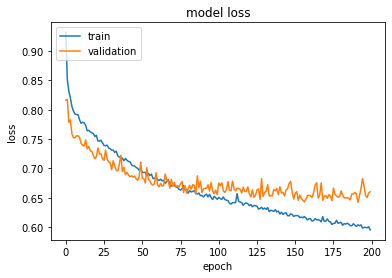

In [35]:
print(train_history.history.keys())
# "Loss" val==validation==test
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Make predictions on the test set

In [36]:
y_pred_scaled = built_model.predict(x_test_scaled, verbose=1)  # Generates output predictions for the input samples
# inverse y-pred to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
# compare y & y-hat in original scale
rmse_pred_test = math.sqrt(mean_squared_error(y_test, y_pred))
rmse_pred_test

383/383 [==============================] - 0s 554us/step


5.6851612427924305

### time run

In [37]:
now2 = dt.now()
runtime = now2-now1
print(runtime)

0:01:02.754526
